In [5]:
pip install --upgrade camel-tools


Note: you may need to restart the kernel to use updated packages.


### Version 1

In [1]:
from camel_tools.utils.normalize import normalize_unicode, normalize_alef_maksura_ar, normalize_alef_ar, normalize_teh_marbuta_ar
import re

def preprocess_text(text):
    # Normalize Arabic
    text = normalize_unicode(text)  # Normalize Unicode
    text = normalize_alef_maksura_ar(text)  # Convert ى to ي
    text = normalize_alef_ar(text)  # Convert إئؤأ to ء
    text = normalize_teh_marbuta_ar(text) # Convert ة to ه
    text = re.sub(r'[\u064B-\u065F]', '', text)   # Remove diacritics
    text = re.sub(r'http\S+|www.\S+', '', text)  # Links
    text = re.sub(r'[^\w\s]', ' ', text)  # Replace punctuation with a space
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [2]:
import pandas as pd

df1 = pd.read_csv('/Users/najlaalhomaid/Desktop/smsDataLast.csv')

In [3]:
df1["Message Content"] = df1["Message Content"].apply(preprocess_text)

In [4]:
df1.to_csv("Data_cleaned_v1.csv", index=False)


### Version 2

In [5]:
def preprocess_text2(text):
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)  # Remove digits (0-9)
    return text

In [6]:
df2 = df1

In [7]:
df2["Message Content"] = df2["Message Content"].apply(preprocess_text2)

In [8]:
df2["Message Content"][1]

'عميلنا العزيز تم اكتشاف عطل فني علي هاتفكم رقم وتمت معالجته ونعتذر عن اي خلل قد تسبب فيه سابقا'

In [22]:
all_text = " ".join(df2["Message Content"])
tokens = all_text.split()

In [23]:
from collections import Counter

word_counts = Counter(tokens)
most_common_words = word_counts.most_common(20)  # Top 20 most frequent words

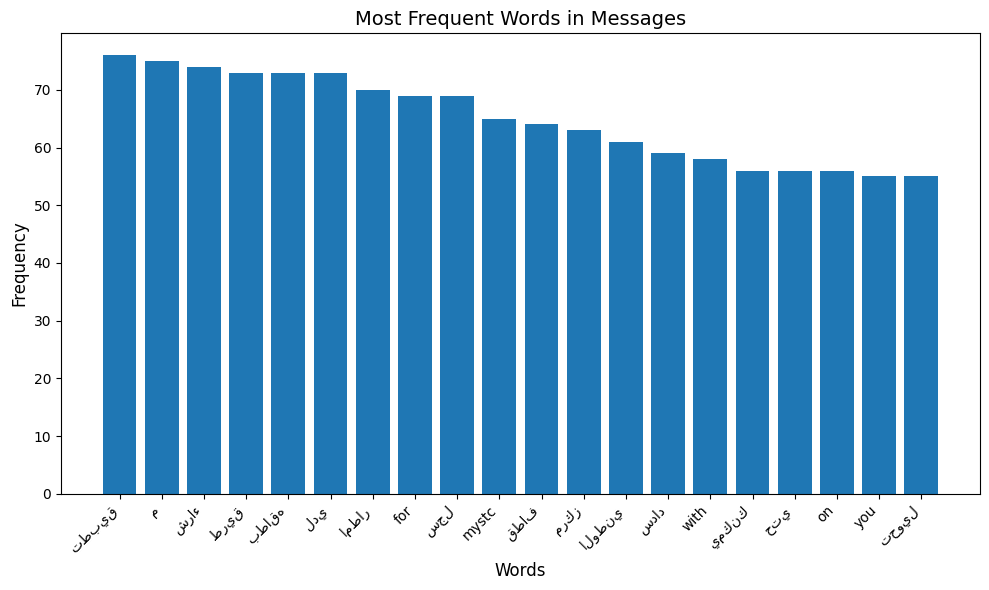

In [24]:
import matplotlib.pyplot as plt

# Visualization of the most frequent words
words, counts = zip(*most_common_words)  # Extract words and their counts

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Most Frequent Words in Messages', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [25]:
stop_words = {word for word, _ in most_common_words}

In [20]:
# Remove stop words from messages
df2["Message Content"] = df2["Message Content"].apply(lambda x: " ".join(
    [word for word in x.split() if word not in stop_words]
))

In [21]:
df2["Message Content"][1]

'اكتشاف عطل فني هاتفكم وتمت معالجته ونعتذر اي خلل قد تسبب فيه سابقا'

In [26]:
df2.head()

,Sender,Message Content,Category
0,maharah co.,لفتره محدوده خصم خدمه العماله المنزليه بنظام ا...,Promotional
1,stc,اكتشاف عطل فني هاتفكم وتمت معالجته ونعتذر اي خ...,Telecommunications
2,stc,نتشرف بخدمتكم ونفيدكم بانه قبول طلبكم ونقوم حا...,Telecommunications
3,mawarid,طريق سداد ذلك عقد RH,Commercial
4,alrajhibank,عزيزتنا عميله التميز نهنئكم بعيد الاضحي المبار...,Promotional


In [27]:
df2.to_csv("Data_cleaned_v2.csv", index=False)

### Version 3

In [64]:
df3 = df2

In [66]:
def is_arabic_text(text):
    """
    Checks if the text is primarily Arabic by calculating the proportion of Arabic characters.
    """
    arabic_chars = re.findall(r'[\u0600-\u06FF]', text)
    return len(arabic_chars) / len(text) > 0.5 if len(text) > 0 else False

def remove_english_words(text):
    """
    Removes English words from Arabic text.
    """
    # If the text is primarily Arabic, remove English words
    if is_arabic_text(text):
        text = re.sub(r'\b[A-Za-z]+\b', '', text)  # Remove English words
        text = re.sub(r'\s+', ' ', text).strip()   # Remove extra spaces
    return text

In [67]:
df3["Message Content"] = df3["Message Content"].apply(remove_english_words)

In [68]:
df3["Message Content"][10]

'طريق سداد ذلك عقد'

In [69]:
df3.head(10)

,Sender,Message Content,Category
0,maharah co.,لفتره محدوده خصم خدمه العماله المنزليه بنظام ا...,Promotional
1,stc,اكتشاف عطل فني هاتفكم وتمت معالجته ونعتذر اي خ...,Telecommunications
2,stc,نتشرف بخدمتكم ونفيدكم بانه قبول طلبكم ونقوم حا...,Telecommunications
3,mawarid,طريق سداد ذلك عقد,Commercial
4,alrajhibank,عزيزتنا عميله التميز نهنئكم بعيد الاضحي المبار...,Promotional
5,900,تقبل منا ومنك الطاعات وكل عام وانت بخير,Promotional
6,mawarid,عملينا زيارتك الطريق اليك برجاء التجهيز لاستقب...,Services
7,mawarid,طريق سداد ذلك عقد,Commercial
8,mawarid,عميلتا نشكرك اهتمامك نرجو ان تنال جميع الزيارا...,Services
9,mawarid,Dear customer thank you for feedback we hope a...,Services


In [71]:
df3 = df3.drop_duplicates()

In [72]:
df3.shape

(848, 3)

In [73]:
df3.to_csv("Data_cleaned_v3.csv", index=False)